In [1]:
from compositionspace import *

In [2]:
files = chunkify_apt_df("data")

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [3]:
files

['/mnt/c/Users/menon/Documents/winrepos/CompositionSpaceNFDI/tests/file_R31_06365-v02_pos_large_chunks_arr.h5']

In [4]:
files_vox = voxelise(files)

  0%|          | 0/10 [00:00<?, ?it/s]

In [5]:
calculate_voxel_composition(files_vox[0], outfilename="voxel_comp.h5")

  0%|          | 0/23259 [00:00<?, ?it/s]

In [6]:
PCA_cumsum, ratios = calculate_PCA_cumsum(vox_ratio_file="voxel_comp.h5", 
                                          vox_file = files_vox[0])

In [7]:
num_clusters = 10
AIC, BIC =  find_num_clusters(vox_ratio_file="voxel_comp.h5", 
                                               vox_file =files_vox[0], 
                                               num_clusters=num_clusters)

  0%|          | 0/9 [00:00<?, ?it/s]

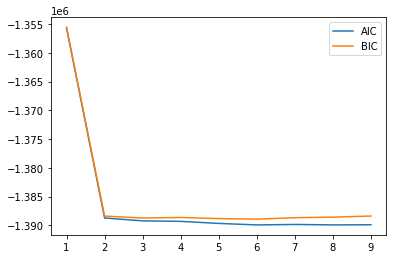

In [8]:
num_cLusters_lst = list(range(1, num_clusters))
plt.plot(num_cLusters_lst, AIC, label="AIC")
plt.plot(num_cLusters_lst, BIC, label="BIC")
plt.legend()

In [9]:
results = find_cluster_composition("voxel_comp.h5", 
                                   files_vox[0],
                                   num_clusters,
                                   save=True,
                                   outfile="vox_centroids.h5")

  0%|          | 0/23259 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

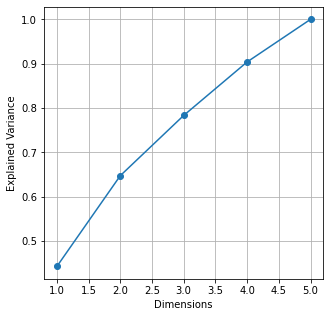

In [10]:
plt.figure(figsize=(5,5))
plt.plot( range(1,6,1),PCA_cumsum,"-o")
plt.ylabel("Explained Variance")
plt.xlabel('Dimensions')
plt.grid()

In [17]:
from pychromatic import Multiplot
from pychromatic.colors import accent

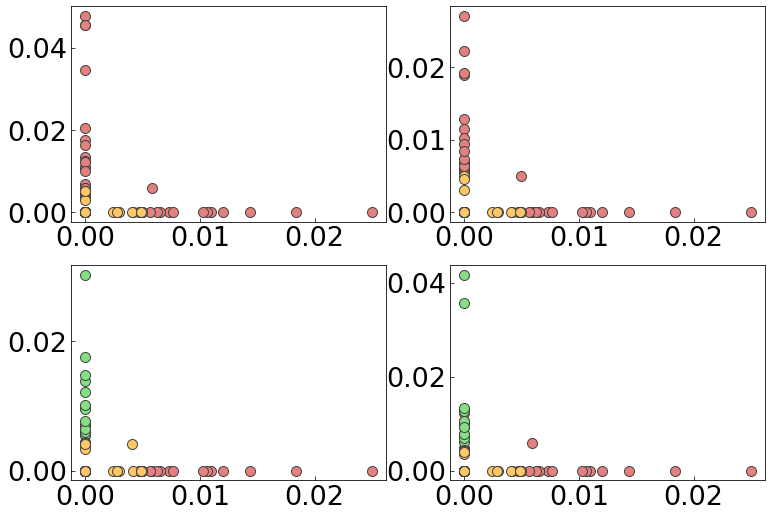

In [42]:
mlt = Multiplot(columns=2, rows=2, width=900, ratio=0.7)

for i in range(2):
    mlt[0,i].plot(results[1]["4.0"], results[1]["{}.0".format(int(i))], "o", color=accent["pred"], 
                  ms = 10, markeredgecolor=accent["dgrey"])
    mlt[0,i].plot(results[0]["4.0"], results[0]["{}.0".format(int(i))], "o", color=accent["pgreen"], 
                  ms = 10, markeredgecolor=accent["dgrey"])
    mlt[0,i].plot(results[2]["4.0"], results[2]["{}.0".format(int(i))], "o", color=accent["pyellow"], 
                  ms = 10, markeredgecolor=accent["dgrey"])
    
for i in range(2, 4):
    mlt[1,i-2].plot(results[1]["4.0"], results[1]["{}.0".format(int(i))], "o", color=accent["pred"], 
                  ms = 10, markeredgecolor=accent["dgrey"])
    mlt[1,i-2].plot(results[0]["4.0"], results[0]["{}.0".format(int(i))], "o", color=accent["pgreen"], 
                  ms = 10, markeredgecolor=accent["dgrey"])
    mlt[1,i-2].plot(results[2]["4.0"], results[2]["{}.0".format(int(i))], "o", color=accent["pyellow"], 
                  ms = 10, markeredgecolor=accent["dgrey"])